In [47]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [48]:
import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

In [49]:
no_of_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = keras.utils.to_categorical(y_train, no_of_classes)
y_test = keras.utils.to_categorical(y_test, no_of_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [50]:
model = keras.Sequential(
    [
        layers.Dense(128, activation="relu", input_shape=(3072,)),
        layers.Dense(24, activation="relu"),
        layers.Dense(10, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dense_7 (Dense)             (None, 24)                3096      
                                                                 
 dense_8 (Dense)             (None, 10)                250       
                                                                 
Total params: 396,690
Trainable params: 396,690
Non-trainable params: 0
_________________________________________________________________


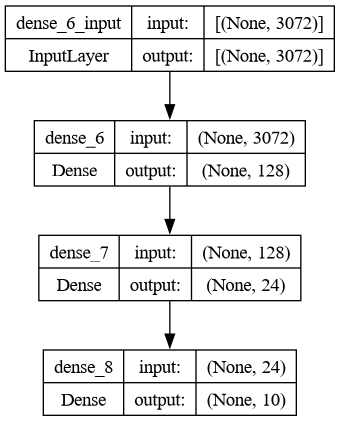

In [51]:
keras.utils.plot_model(model, show_shapes=True)

In [52]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [53]:
history = model.fit(x_train, y_train, batch_size=150, epochs=50)

Epoch 1/50
334/334 [==============================] - 3s 9ms/step - loss: 2.1361 - accuracy: 0.2103
Epoch 2/50
334/334 [==============================] - 2s 7ms/step - loss: 1.9212 - accuracy: 0.3176
Epoch 3/50
334/334 [==============================] - 2s 7ms/step - loss: 1.8359 - accuracy: 0.3526
Epoch 4/50
334/334 [==============================] - 2s 7ms/step - loss: 1.7905 - accuracy: 0.3668
Epoch 5/50
334/334 [==============================] - 2s 6ms/step - loss: 1.7558 - accuracy: 0.3821
Epoch 6/50
334/334 [==============================] - 2s 7ms/step - loss: 1.7251 - accuracy: 0.3926
Epoch 7/50
334/334 [==============================] - 2s 7ms/step - loss: 1.6966 - accuracy: 0.4026
Epoch 8/50
334/334 [==============================] - 2s 6ms/step - loss: 1.6770 - accuracy: 0.4105
Epoch 9/50
334/334 [==============================] - 2s 6ms/step - loss: 1.6494 - accuracy: 0.4197
Epoch 10/50
334/334 [==============================] - 2s 6ms/step - loss: 1.6355 - accuracy: 0.4253

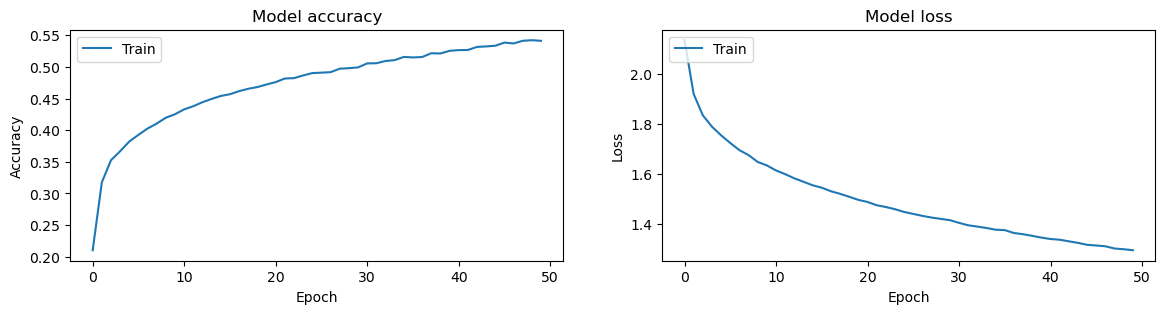

In [54]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train"], loc="upper left")

plt.show()

In [55]:
test_loss_digit, test_acc_digit = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4210 - accuracy: 0.4947


In [56]:
print("Testing Accuracy : ", round(test_acc_digit, 4) * 100, "%")

Testing Accuracy :  49.47 %


313/313 [==============================] - 3s 9ms/step


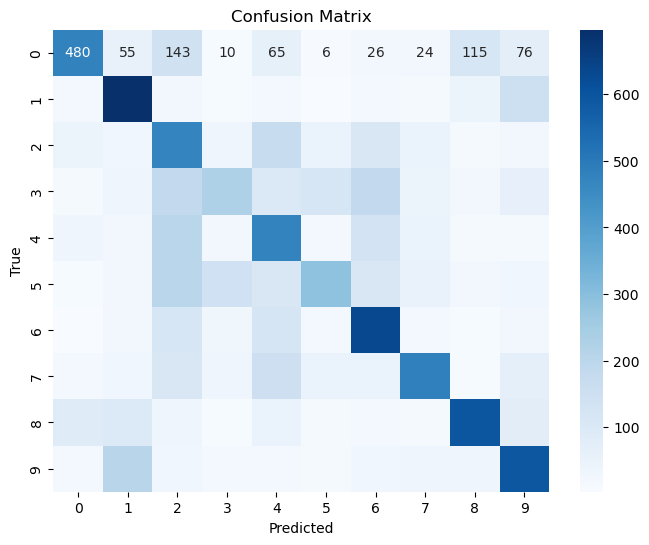

In [57]:
# plot the confusion matrix for the testing dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(x_test)

# Convert the predictions and true labels to classes (assuming one-hot encoding for true labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Random class taken is 9885


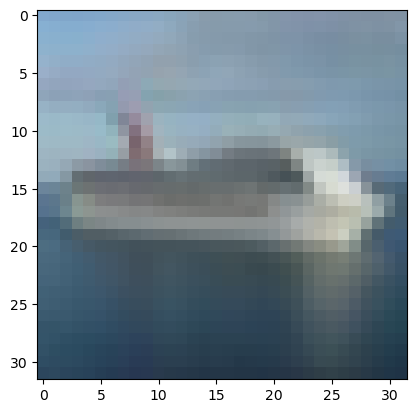

Actual class :  8
1/1 [==============================] - 0s 15ms/step
Predicted class :  8


In [58]:
# take one random sample from test and show the predicted vs actual
import random

i = random.randint(1, 10000)
print("Random class taken is", i)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.show()
print("Actual class : ", y_test[i].argmax())
print("Predicted class : ", model.predict(x_test[i].reshape(1, 3072)).argmax())